In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-10-27 21:39:23--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-27 21:39:23 (45.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

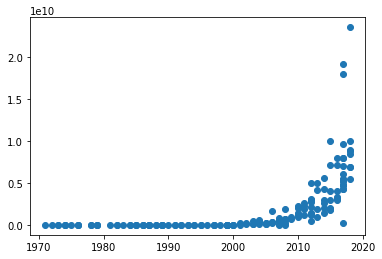

In [4]:
plt.scatter(X,Y)

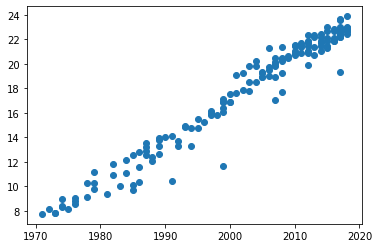

In [5]:
Y = np.log(Y)
plt.scatter(X,Y)
X = X - X.mean()

In [9]:
model = Sequential([
        Input(shape=(1,)),
        Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 342.5509
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 318.6858
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 385.8728
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 376.3307
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 272.7603
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 180.9376
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 252.2860
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 147.8576
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 92.1060
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 77.7440
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 40.2363
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 26.8420
Epoch 13/200
6/6 [=======================

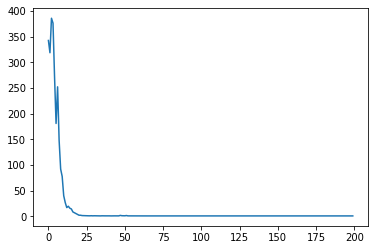

In [10]:
plt.plot(r.history['loss'], label='loss')

In [12]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34078893]], dtype=float32), array([17.754078], dtype=float32)]


In [13]:
a = model.layers[0].get_weights()[0][0,0]

0.34078893